In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.core.display import display, HTML

class DataAutomation:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        ext = os.path.splitext(self.file_path)[1]
        if ext == ".csv":
            return pd.read_csv(self.file_path)
        elif ext in [".xls", ".xlsx"]:
            return pd.read_excel(self.file_path)
        elif ext == ".json":
            return pd.read_json(self.file_path)
        else:
            raise ValueError("Unsupported file format. Use CSV, Excel, or JSON.")

    def clean_data(self):
        self.df.drop_duplicates(inplace=True)
        self.df.fillna(self.df.mean(numeric_only=True), inplace=True)
        self.df.fillna("Unknown", inplace=True)
        for col in self.df.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col].astype(str))
        return self.df

    def scale_data(self):
        scaler = StandardScaler()
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
        return self.df

    def generate_visualizations(self):
        for col in self.df.columns:
            if self.df[col].dtype in [np.int64, np.float64]:
                plt.figure(figsize=(6, 4))
                sns.histplot(self.df[col], kde=True, bins=30)
                plt.title(f'Histogram of {col}')
                plt.savefig(f'/content/sample_data/plots/{col}_histogram.png')
                plt.close()

        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.savefig("/content/sample_data/plots/correlation_heatmap.png")
        plt.close()

    def summarize_dataset(self):
        summary = {
            "total_rows": len(self.df),
            "total_columns": len(self.df.columns),
            "missing_values": self.df.isnull().sum().to_dict(),
            "correlations": self.df.corr().to_dict()
        }
        return json.dumps(summary, indent=4)

    def generate_reports(self):
        profile = ProfileReport(self.df, explorative=True)
        profile.to_file("data_report.html")

    def run(self):
        self.clean_data()
        self.scale_data()
        self.generate_visualizations()
        self.generate_reports()
        summary = self.summarize_dataset()
        display(HTML("<h2>Dataset Summary</h2><pre>" + summary + "</pre>"))
        return self.df

if __name__ == "__main__":
    file_path = "/content/climate_data.csv"  # Replace with the actual file path
    automation = DataAutomation(file_path)
    processed_df = automation.run()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import streamlit as st
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
from IPython.core.display import display, HTML

class DataAutomation:
    def __init__(self, file):
        self.file = file
        self.df = self.load_data()

    def load_data(self):
        ext = os.path.splitext(self.file.name)[1]
        if ext == ".csv":
            return pd.read_csv(self.file)
        elif ext in [".xls", ".xlsx"]:
            return pd.read_excel(self.file)
        elif ext == ".json":
            return pd.read_json(self.file)
        else:
            raise ValueError("Unsupported file format. Use CSV, Excel, or JSON.")

    def clean_data(self):
        self.df.drop_duplicates(inplace=True)
        self.df.fillna(self.df.mean(numeric_only=True), inplace=True)
        self.df.fillna("Unknown", inplace=True)
        for col in self.df.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col].astype(str))
        return self.df

    def scale_data(self):
        scaler = StandardScaler()
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
        return self.df

    def detect_outliers(self):
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df['outlier_score'] = self.df[numeric_cols].apply(zscore).abs().max(axis=1)
        return self.df[self.df['outlier_score'] > 3]

    def generate_visualizations(self):
        os.makedirs("plots", exist_ok=True)
        for col in self.df.columns:
            if self.df[col].dtype in [np.int64, np.float64]:
                plt.figure(figsize=(6, 4))
                sns.histplot(self.df[col], kde=True, bins=30)
                plt.title(f'Histogram of {col}')
                plt.savefig(f'plots/{col}_histogram.png')
                plt.close()

        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.savefig("plots/correlation_heatmap.png")
        plt.close()

        for col in self.df.columns:
            if self.df[col].dtype in [np.int64, np.float64]:
                plt.figure(figsize=(6, 4))
                sns.boxplot(y=self.df[col])
                plt.title(f'Boxplot of {col}')
                plt.savefig(f'plots/{col}_boxplot.png')
                plt.close()

    def summarize_dataset(self):
        summary = {
            "total_rows": len(self.df),
            "total_columns": len(self.df.columns),
            "column_names": self.df.columns.tolist(),
            "missing_values": self.df.isnull().sum().to_dict(),
            "basic_statistics": self.df.describe().to_dict(),
            "correlations": self.df.corr().to_dict(),
            "outliers": len(self.detect_outliers())
        }
        return json.dumps(summary, indent=4)

    def generate_reports(self):
        profile = ProfileReport(self.df, explorative=True)
        profile.to_file("data_report.html")

    def groupby_analysis(self, column):
        if column in self.df.columns:
            return self.df.groupby(column).mean().reset_index()
        return None

    def run(self):
        self.clean_data()
        self.scale_data()
        self.generate_visualizations()
        self.generate_reports()
        summary = self.summarize_dataset()
        display(HTML("<h2>Dataset Summary</h2><pre>" + summary + "</pre>"))
        return self.df

def main():
    st.title("Automated Data Processing & EDA")
    uploaded_file = st.file_uploader("Upload your dataset", type=["csv", "xls", "xlsx", "json"])
    if uploaded_file is not None:
        automation = DataAutomation(uploaded_file)
        processed_df = automation.run()
        st.write("### Processed Data Preview")
        st.dataframe(processed_df.head())
        st.write("### Dataset Summary")
        st.json(automation.summarize_dataset())

        st.write("### Outlier Detection")
        outliers_df = automation.detect_outliers()
        if not outliers_df.empty:
            st.dataframe(outliers_df)
        else:
            st.write("No significant outliers detected.")

        st.write("### Grouped Analysis")
        selected_column = st.selectbox("Select column for GroupBy analysis", processed_df.columns)
        grouped_df = automation.groupby_analysis(selected_column)
        if grouped_df is not None:
            st.dataframe(grouped_df)

        st.write("### Generated Reports")
        with open("data_report.html", "r") as f:
            st.download_button("Download HTML Report", f, "data_report.html", "text/html")

if __name__ == "__main__":
    main()


2025-02-20 21:18:05.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 21:18:05.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [13]:
#!pip install streamlit

Please upload your dataset (CSV, Excel, or JSON)


Saving climate_data.csv to climate_data (1).csv


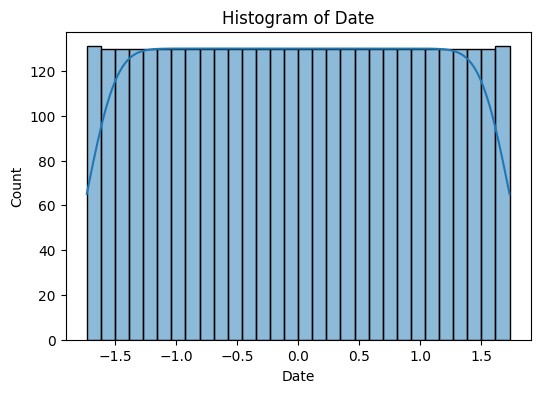

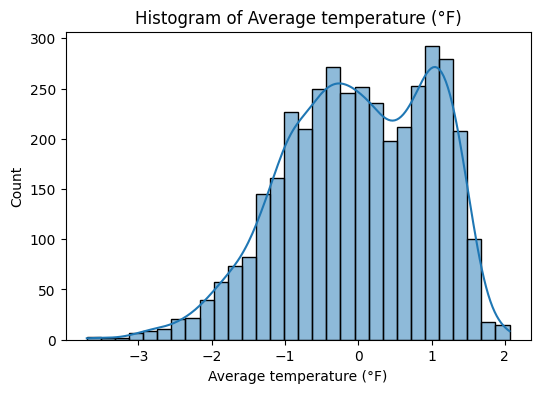

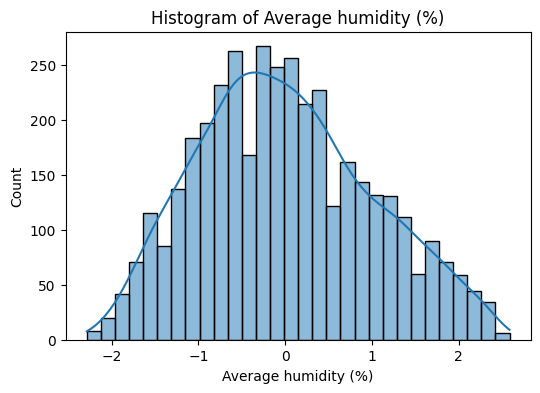

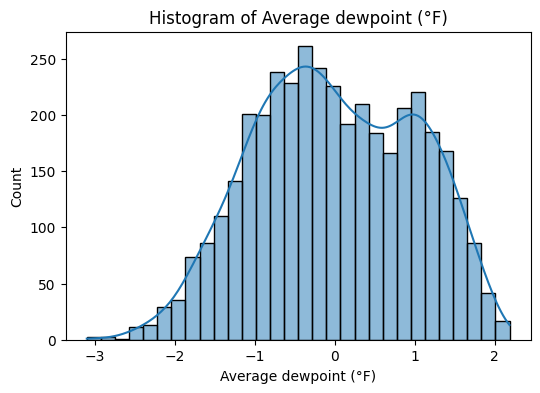

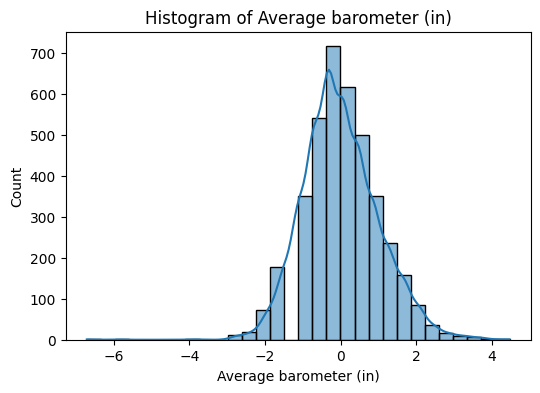

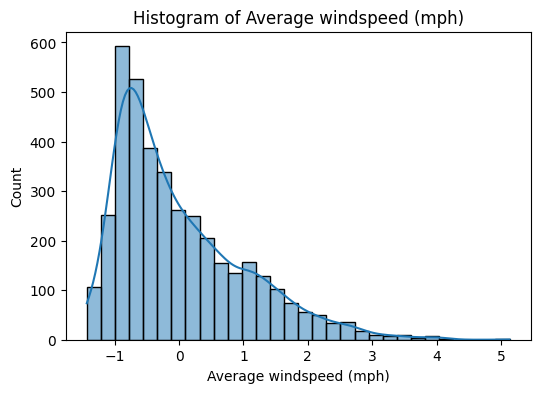

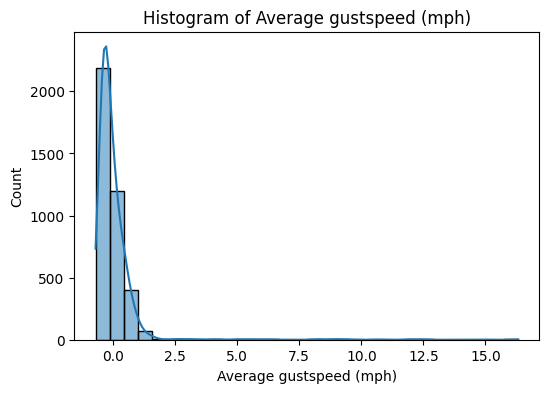

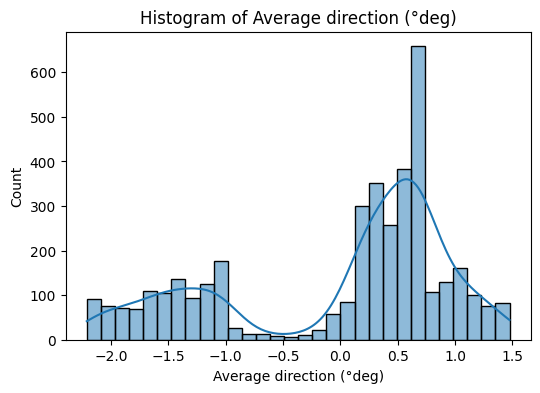

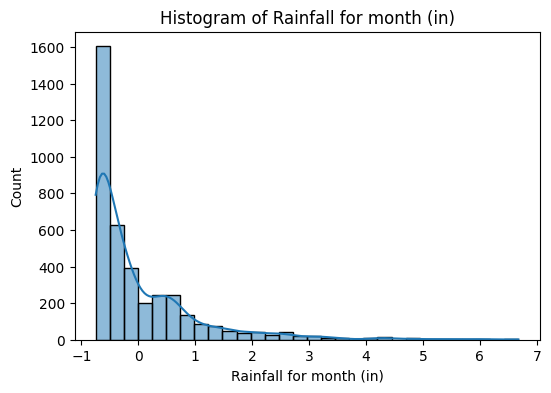

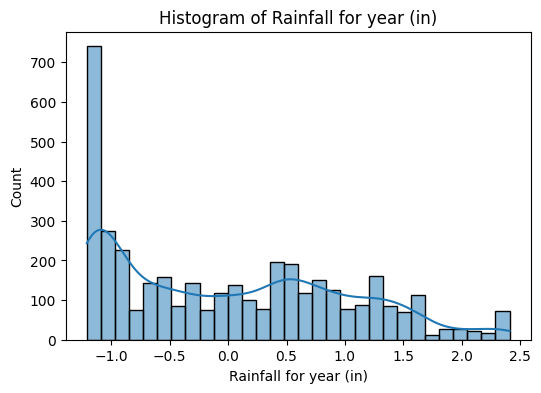

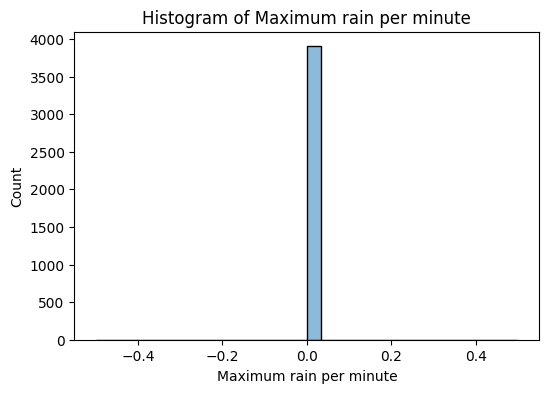

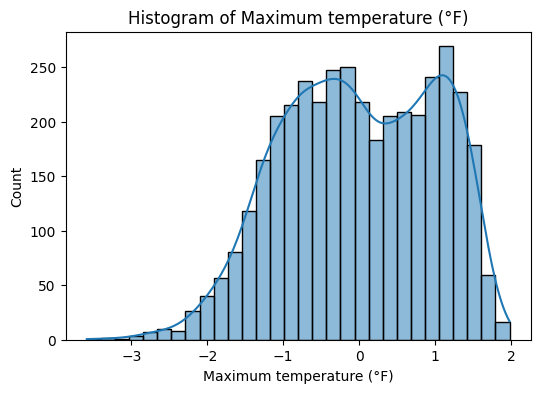

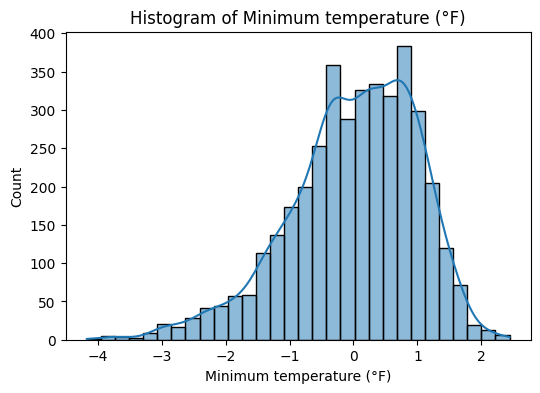

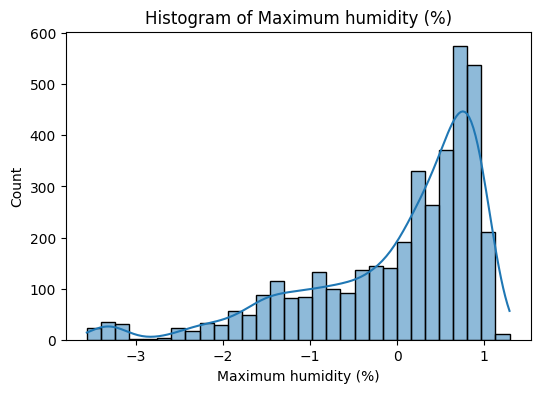

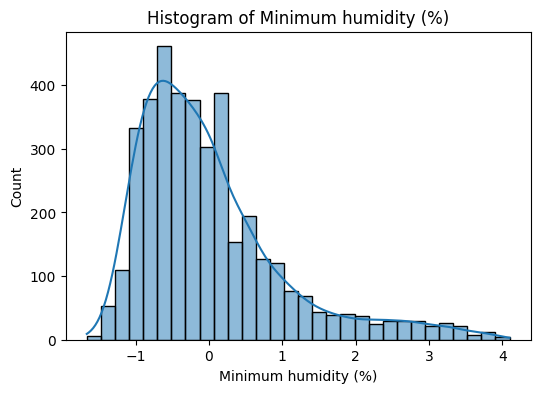

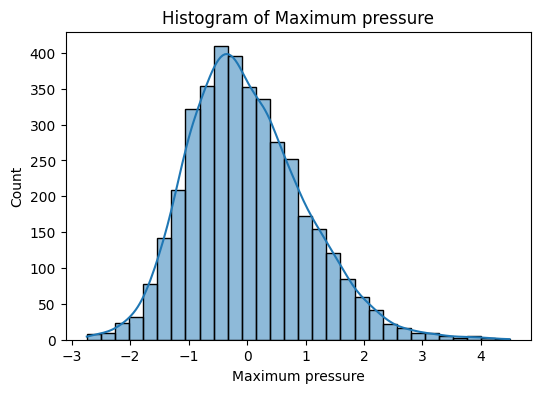

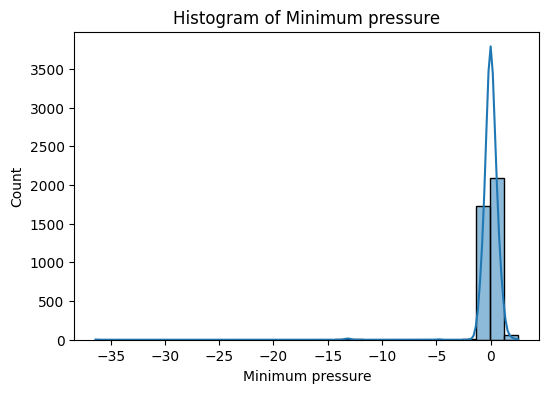

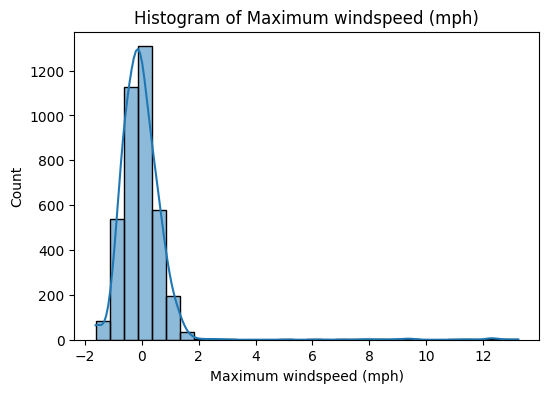

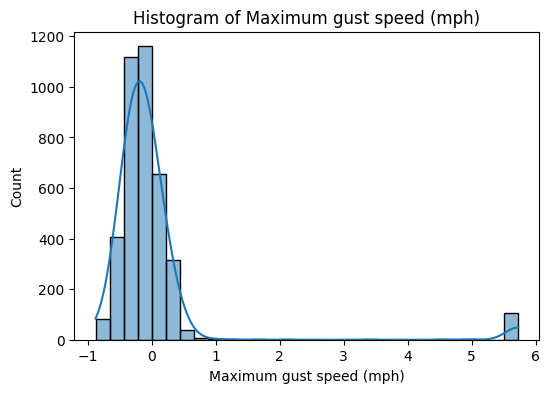

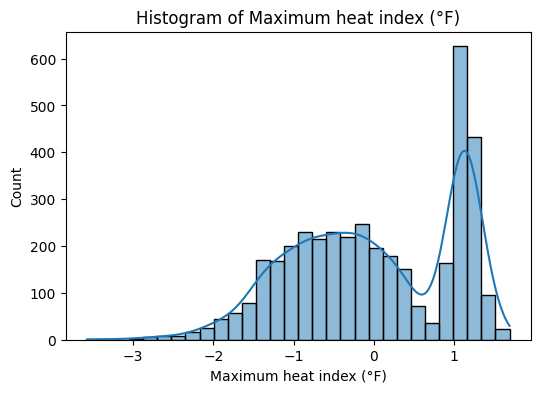

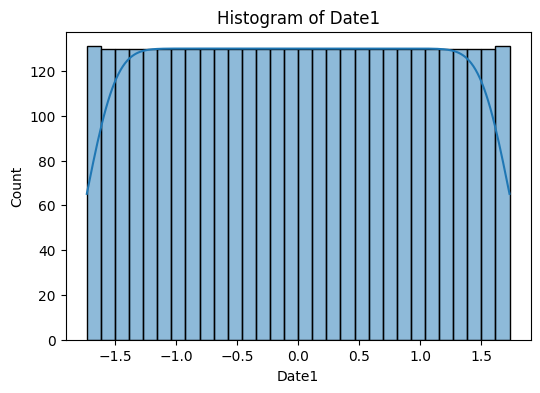

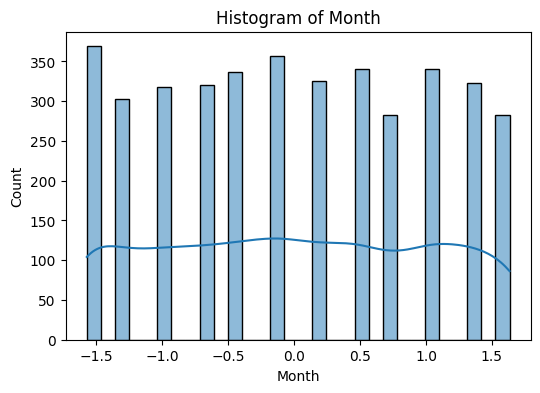

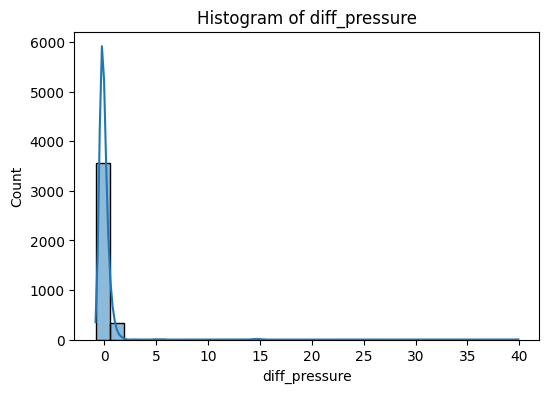

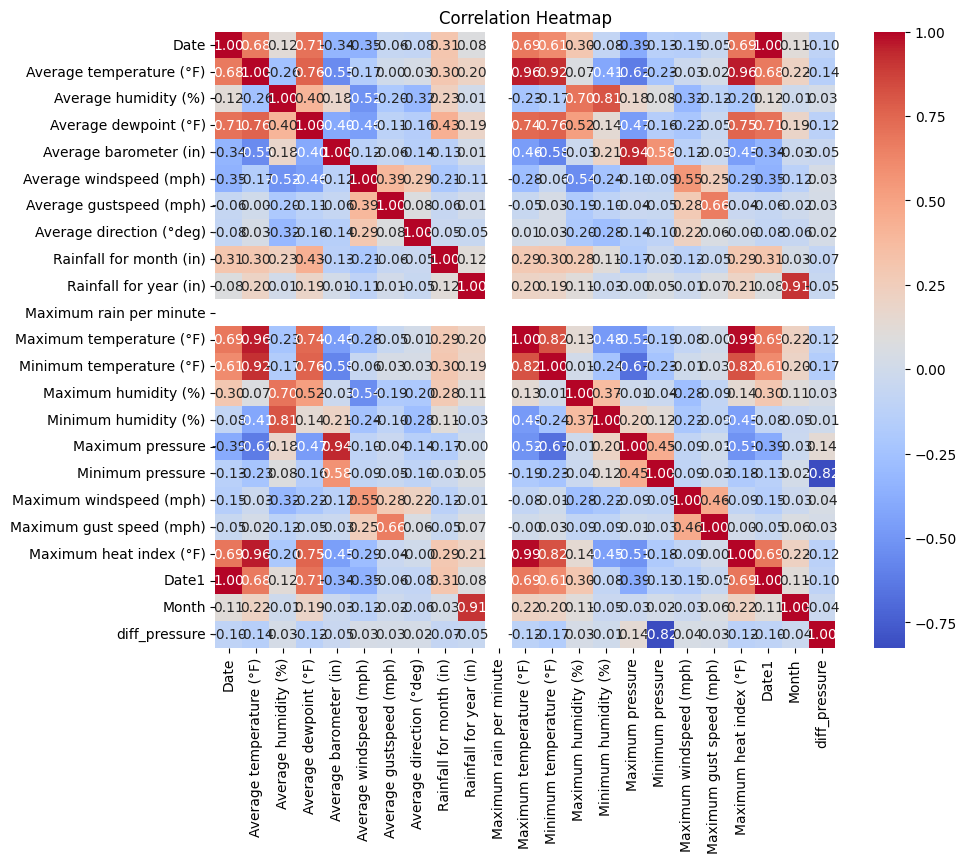

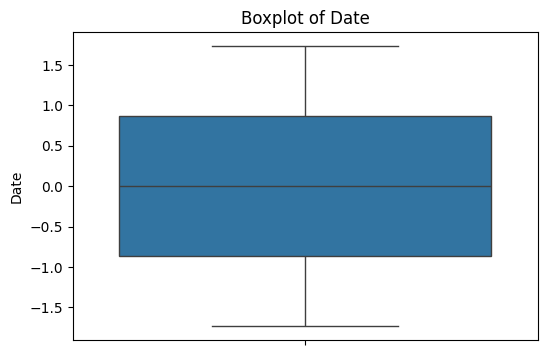

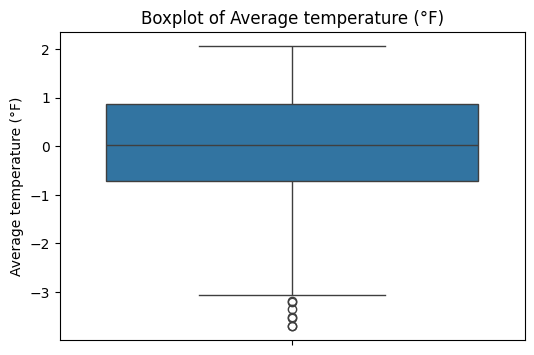

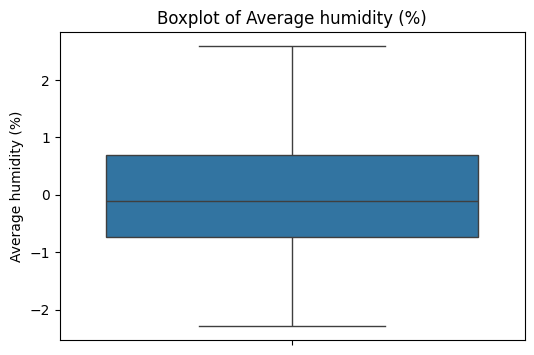

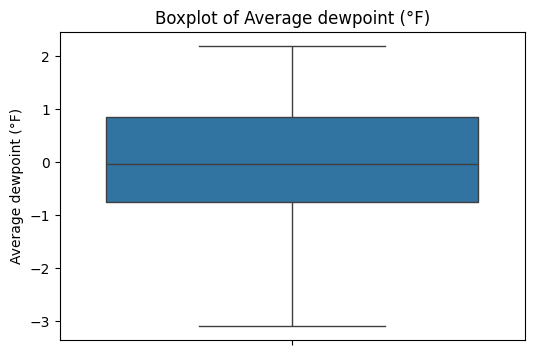

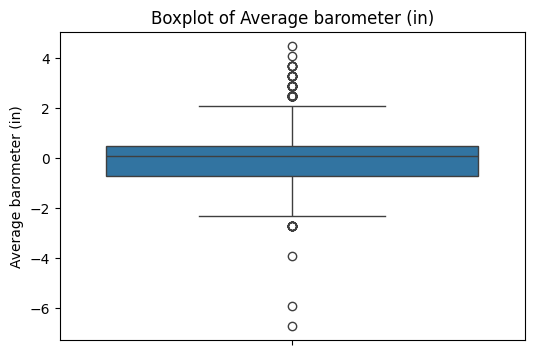

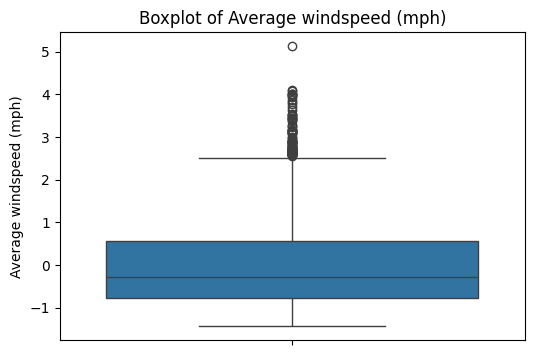

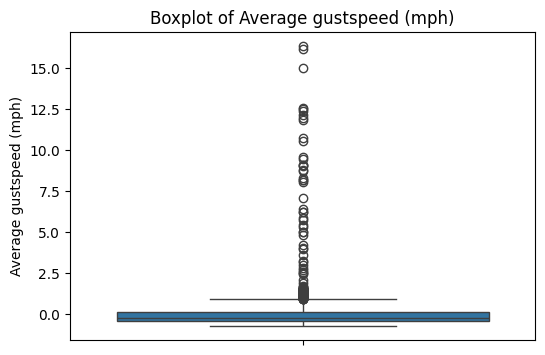

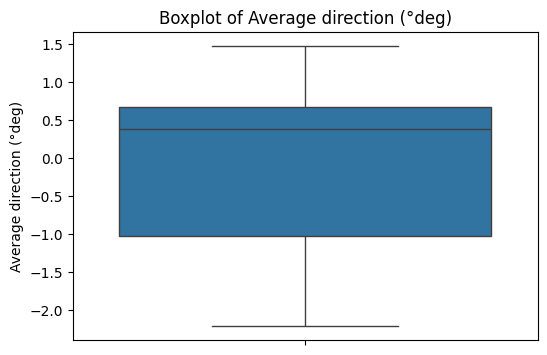

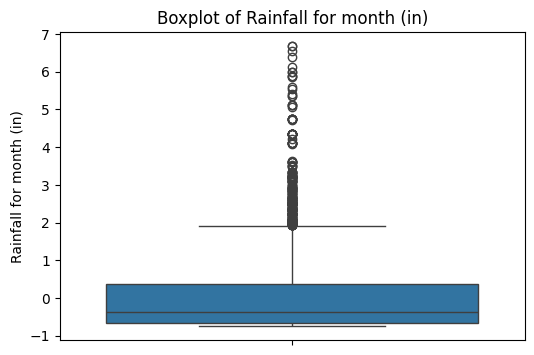

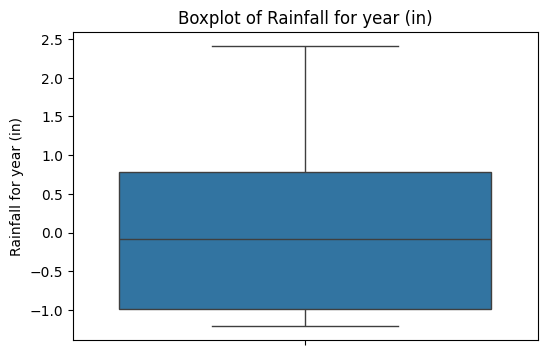

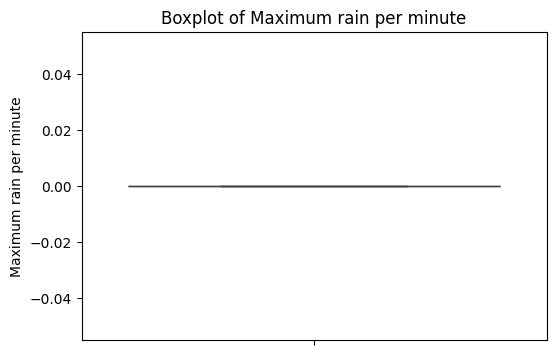

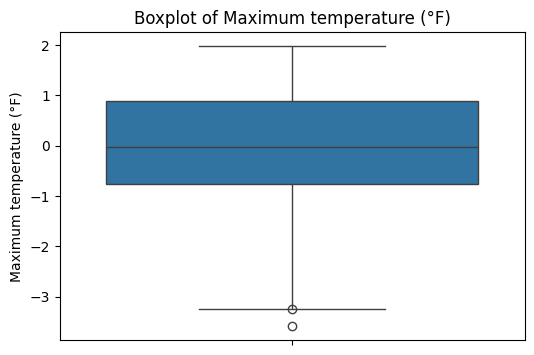

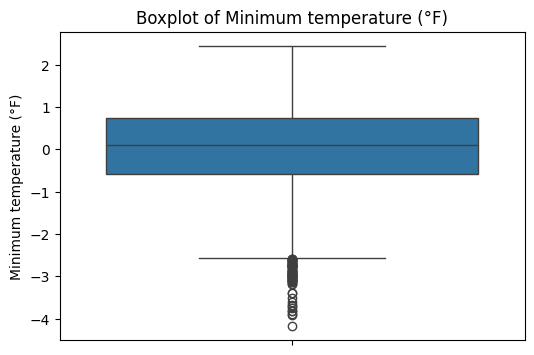

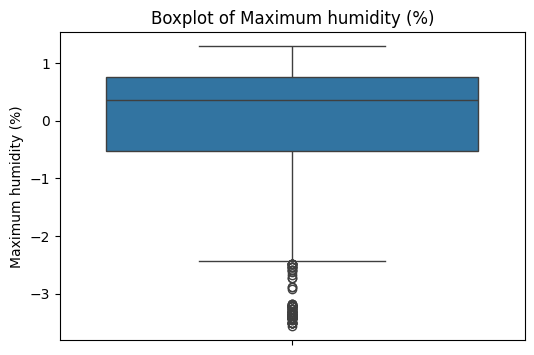

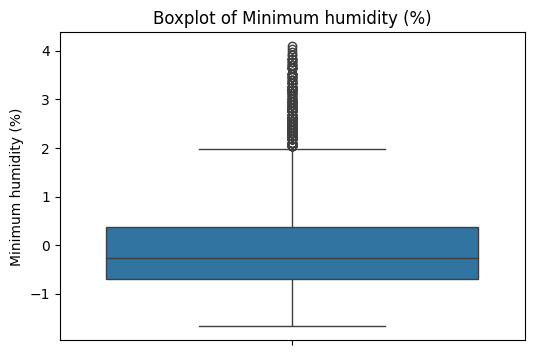

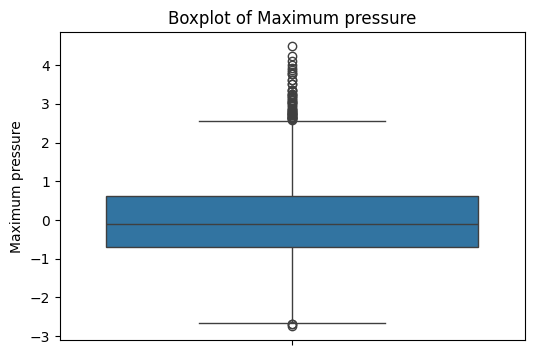

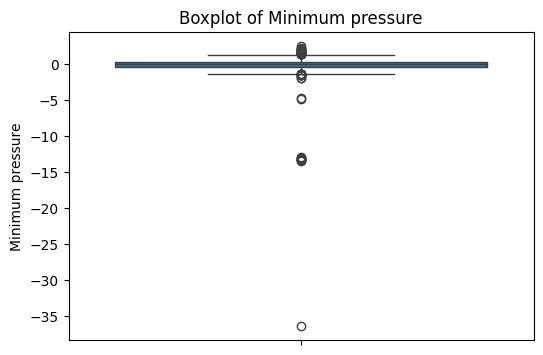

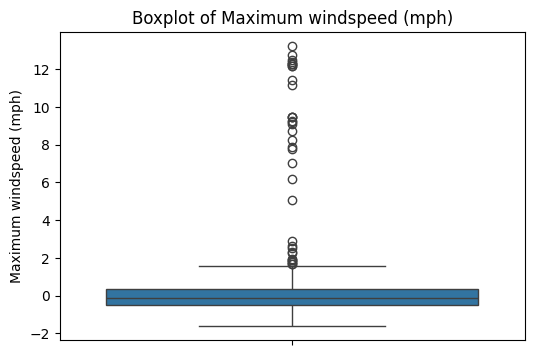

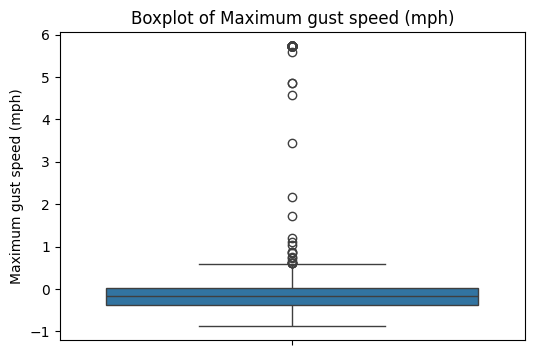

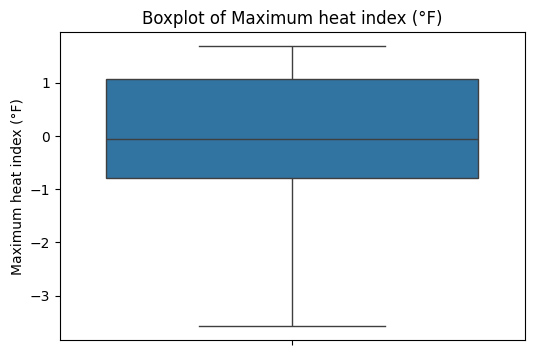

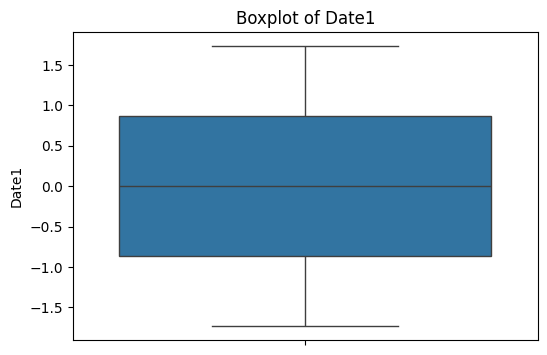

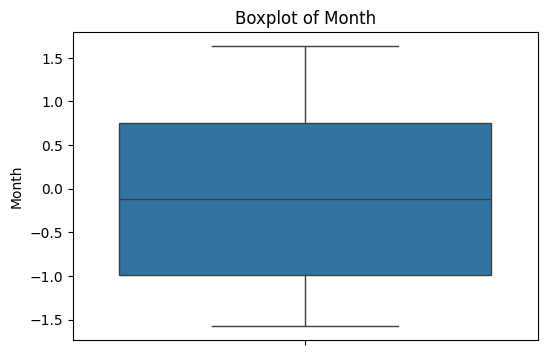

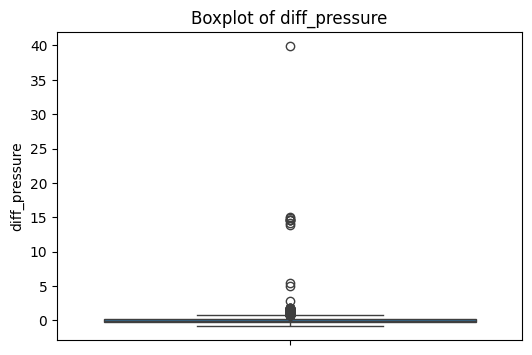

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Processed Data Preview:


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,outlier_score
0,-1.731607,-0.448340,-0.795944,-0.712608,-0.724628,5.132089,1.897756,0.593482,-0.747623,-1.210044,...,0.062930,-1.098190,-0.233866,1.762263,0.647857,-1.007529,-1.731607,-1.573185,-0.436447,5.132089
1,-1.616196,-0.095971,-0.968002,-0.575924,-1.523470,1.750661,0.565899,0.245354,-0.747623,-1.210044,...,-0.641211,-1.458506,-0.960119,1.296343,0.440751,-0.339049,-1.616196,-1.573185,0.140316,3.419068
2,-1.499010,-1.237908,0.637878,-0.712608,-0.724628,0.631807,0.155008,0.757307,-0.747623,-1.210044,...,0.575033,0.722760,-0.977833,0.446242,0.104203,-0.951823,-1.499010,-1.573185,1.541726,3.222777
3,-1.467050,-2.308067,1.039348,-1.573722,2.071317,-0.710819,-0.390487,-1.730784,-0.747623,-1.210044,...,0.575033,2.016798,1.163285,-0.583688,-0.361787,-1.453183,-1.467050,-1.573185,-0.011851,3.271850
4,-1.456396,-1.381466,-1.082708,-1.942771,0.074213,2.720336,0.927201,0.501331,-0.747623,-1.210044,...,-0.833250,0.726635,-0.295863,1.484346,0.492527,-1.453183,-1.456396,-1.573185,0.788253,3.369995



Dataset Summary:
{
    "total_rows": 3902,
    "total_columns": 24,
    "column_names": [
        "Date",
        "Average temperature (\u00b0F)",
        "Average humidity (%)",
        "Average dewpoint (\u00b0F)",
        "Average barometer (in)",
        "Average windspeed (mph)",
        "Average gustspeed (mph)",
        "Average direction (\u00b0deg)",
        "Rainfall for month (in)",
        "Rainfall for year (in)",
        "Maximum rain per minute",
        "Maximum temperature (\u00b0F)",
        "Minimum temperature (\u00b0F)",
        "Maximum humidity (%)",
        "Minimum humidity (%)",
        "Maximum pressure",
        "Minimum pressure",
        "Maximum windspeed (mph)",
        "Maximum gust speed (mph)",
        "Maximum heat index (\u00b0F)",
        "Date1",
        "Month",
        "diff_pressure",
        "outlier_score"
    ],
    "missing_values": {
        "Date": 0,
        "Average temperature (\u00b0F)": 0,
        "Average humidity (%)": 0,
        

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,outlier_score
0,-1.731607,-0.448340,-0.795944,-0.712608,-0.724628,5.132089,1.897756,0.593482,-0.747623,-1.210044,...,0.062930,-1.098190,-0.233866,1.762263,0.647857,-1.007529,-1.731607,-1.573185,-0.436447,5.132089
1,-1.616196,-0.095971,-0.968002,-0.575924,-1.523470,1.750661,0.565899,0.245354,-0.747623,-1.210044,...,-0.641211,-1.458506,-0.960119,1.296343,0.440751,-0.339049,-1.616196,-1.573185,0.140316,3.419068
2,-1.499010,-1.237908,0.637878,-0.712608,-0.724628,0.631807,0.155008,0.757307,-0.747623,-1.210044,...,0.575033,0.722760,-0.977833,0.446242,0.104203,-0.951823,-1.499010,-1.573185,1.541726,3.222777
3,-1.467050,-2.308067,1.039348,-1.573722,2.071317,-0.710819,-0.390487,-1.730784,-0.747623,-1.210044,...,0.575033,2.016798,1.163285,-0.583688,-0.361787,-1.453183,-1.467050,-1.573185,-0.011851,3.271850
4,-1.456396,-1.381466,-1.082708,-1.942771,0.074213,2.720336,0.927201,0.501331,-0.747623,-1.210044,...,-0.833250,0.726635,-0.295863,1.484346,0.492527,-1.453183,-1.456396,-1.573185,0.788253,3.369995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,-0.183326,-1.616379,2.186406,-0.452907,1.671896,-0.959454,-0.489667,-1.996999,0.329633,-0.958602,...,3.199559,1.114071,1.101288,-0.869780,-0.581837,-1.581309,-0.183326,-0.990059,-0.514985,3.199559
3784,0.099875,-1.414093,2.243758,-0.213709,-0.724628,-0.511912,-0.270053,-1.710306,-0.747623,-0.896845,...,3.327584,0.176475,-0.734272,-0.493774,-0.403208,-1.185791,0.099875,-0.698496,0.925695,3.327584
3794,0.025302,-1.779513,2.129053,-0.630598,-0.724628,-0.884863,-0.454246,-1.822935,-0.449306,-0.857144,...,3.455610,0.408937,-0.853838,-0.959694,-0.581837,-1.146796,0.025302,-0.698496,1.205486,3.455610
3795,0.035067,-2.151458,2.014347,-1.047486,1.272475,-0.884863,-0.468414,-1.792218,-0.449306,-0.857144,...,3.263572,1.319412,1.001650,-0.959694,-0.581837,-2.255360,0.035067,-0.698496,-0.274462,3.263572



Grouped Analysis (Auto-Selected Column):

Generated Reports: data_report.html
Download the HTML report from the files section.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
from IPython.display import display, HTML
from google.colab import files

class DataAutomation:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        ext = os.path.splitext(self.file_path)[1]
        if ext == ".csv":
            return pd.read_csv(self.file_path)
        elif ext in [".xls", ".xlsx"]:
            return pd.read_excel(self.file_path)
        elif ext == ".json":
            return pd.read_json(self.file_path)
        else:
            raise ValueError("Unsupported file format. Use CSV, Excel, or JSON.")

    def clean_data(self):
        self.df.drop_duplicates(inplace=True)
        self.df.fillna(self.df.mean(numeric_only=True), inplace=True)
        self.df.fillna("Unknown", inplace=True)
        for col in self.df.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col].astype(str))
        return self.df

    def scale_data(self):
        scaler = StandardScaler()
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
        return self.df

    def detect_outliers(self):
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df['outlier_score'] = self.df[numeric_cols].apply(zscore).abs().max(axis=1)
        return self.df[self.df['outlier_score'] > 3]

    def generate_visualizations(self):
        for col in self.df.columns:
            if self.df[col].dtype in [np.int64, np.float64]:
                plt.figure(figsize=(6, 4))
                sns.histplot(self.df[col], kde=True, bins=30)
                plt.title(f'Histogram of {col}')
                plt.show()

        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()

        for col in self.df.columns:
            if self.df[col].dtype in [np.int64, np.float64]:
                plt.figure(figsize=(6, 4))
                sns.boxplot(y=self.df[col])
                plt.title(f'Boxplot of {col}')
                plt.show()

    def summarize_dataset(self):
        summary = {
            "total_rows": len(self.df),
            "total_columns": len(self.df.columns),
            "column_names": self.df.columns.tolist(),
            "missing_values": self.df.isnull().sum().to_dict(),
            "basic_statistics": self.df.describe().to_dict(),
            "correlations": self.df.corr().to_dict(),
            "outliers": len(self.detect_outliers())
        }
        return json.dumps(summary, indent=4)

    def generate_reports(self):
        profile = ProfileReport(self.df, explorative=True)
        profile.to_file("data_report.html")

    def groupby_analysis(self):
        categorical_columns = self.df.select_dtypes(include=['object', 'category']).columns.tolist()
        if categorical_columns:
            selected_column = categorical_columns[0]  # Auto-select first categorical column
            return self.df.groupby(selected_column).mean().reset_index()
        return None

    def run(self):
        self.clean_data()
        self.scale_data()
        self.generate_visualizations()
        self.generate_reports()
        summary = self.summarize_dataset()
        display(HTML("<h2>Dataset Summary</h2><pre>" + summary + "</pre>"))
        return self.df

def main():
    print("Please upload your dataset (CSV, Excel, or JSON)")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    automation = DataAutomation(file_name)
    processed_df = automation.run()

    print("\nProcessed Data Preview:")
    display(processed_df.head())

    print("\nDataset Summary:")
    print(automation.summarize_dataset())

    print("\nOutlier Detection:")
    outliers_df = automation.detect_outliers()
    if not outliers_df.empty:
        display(outliers_df)
    else:
        print("No significant outliers detected.")

    print("\nGrouped Analysis (Auto-Selected Column):")
    grouped_df = automation.groupby_analysis()
    if grouped_df is not None:
        display(grouped_df)

    print("\nGenerated Reports: data_report.html")
    print("Download the HTML report from the files section.")

if __name__ == "__main__":
    main()


# Summary

This Automated Data Pipeline simplifies the process of data preprocessing, exploratory data analysis (EDA), and report generation in Google Colab. It helps users by automating tedious tasks, enabling them to focus on deeper data analysis and model development.

**Key Features & Benefits**

**📂 Seamless Data Upload & Handling**
- Supports CSV, Excel (.xls, .xlsx), and JSON file formats.
- Automatically detects the file type and loads it into a Pandas DataFrame.
- Helps users avoid manual file conversions and formatting issues.

**🛠 Data Cleaning & Preprocessing**
- Removes duplicates, ensuring clean and reliable data.
- Handles missing values:
- Numeric columns: Filled with the mean value.
- Categorical columns: Replaced with "Unknown" to avoid data loss.
- Encodes categorical variables using Label Encoding.
- Reduces time spent on cleaning and ensures data consistency.

**📊 Feature Scaling for Improved Model Performance**
- Uses StandardScaler to standardize numerical columns.
- Helps in maintaining uniform scale for better ML model accuracy.

**🚨 Outlier Detection for Better Data Quality**
- Identifies potential outliers using Z-score analysis.
- Highlights records with outlier scores greater than 3.
- Ensures better decision-making by filtering extreme values.

**📈 Automated Data Visualization**
- Histograms for numerical distributions.
- Box plots to identify outliers.
- Correlation heatmap to detect relationships between features.
- Helps in quick pattern recognition and feature selection.

**📑 Comprehensive Dataset Summary & Insights**
- Displays total records, column details, missing values, and basic statistics.
- Generates an interactive HTML report using ydata_profiling.
- Saves time by providing ready-to-use insights for analysis.

**🔍 Automated GroupBy Analysis**
- Automatically selects the first categorical column and computes mean - aggregations for numeric features.
- Helps users quickly analyze trends and patterns without manual intervention.

**⚡ Google Colab Integration for Effortless Execution**
- Uses files.upload() to prompt users to upload their dataset.
- Displays results directly within Colab, making it easy to analyze data.
- Generates a downloadable HTML report for deeper exploration.